<a href="https://colab.research.google.com/github/Haadi226/HAADI-projects/blob/main/ZomatoDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.IMPORTING THE NECESSARY LIBRARIES



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.READING THE CSV FILE

In [ ]:
data=pd.read_csv("/content/zomato.csv",on_bad_lines="skip",engine="python")

3.Initial EDA and DataPreprocessing

In [ ]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

SHAPE OF THE DATASET

In [ ]:
data.shape

(51155, 17)

DROPPING THE UNNECESSARY COLUMNS

In [ ]:
data=data.drop(columns=['url','address','phone','dish_liked','menu_item','reviews_list'],axis=1)

In [ ]:
data.shape

(51155, 11)

CHECKING NULL VALUES AND DATATYPES

In [ ]:
data.info()  #Null values are present in rate,resttype,cusines,cost for 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51155 entries, 0 to 51154
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51155 non-null  object
 1   online_order                 51155 non-null  object
 2   book_table                   51155 non-null  object
 3   rate                         43380 non-null  object
 4   votes                        51155 non-null  int64 
 5   location                     51134 non-null  object
 6   rest_type                    50931 non-null  object
 7   cuisines                     51110 non-null  object
 8   approx_cost(for two people)  50811 non-null  object
 9   listed_in(type)              51155 non-null  object
 10  listed_in(city)              51155 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [ ]:
data.drop_duplicates(inplace=True)  # Check the count of duplicate values using duplicated().sum()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51049 entries, 0 to 51154
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51049 non-null  object
 1   online_order                 51049 non-null  object
 2   book_table                   51049 non-null  object
 3   rate                         43294 non-null  object
 4   votes                        51049 non-null  int64 
 5   location                     51028 non-null  object
 6   rest_type                    50825 non-null  object
 7   cuisines                     51004 non-null  object
 8   approx_cost(for two people)  50707 non-null  object
 9   listed_in(type)              51049 non-null  object
 10  listed_in(city)              51049 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


HANDLING THE RATE COLUMN

In [ ]:
data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '2.4 /5', '4.7 /5',
       '2.2 /5', '2.0 /5', '2.1 /5', '1.8 /5'], dtype=object)

REPLACING THE STRING "NEW" AND "-" WITH NAN.AND HANDLING THESE NAN VALUES LATER.

In [ ]:
def Rate(value):
  if value=="NEW" or value=="-":
    return np.nan
  else:
    value=str(value).split("/")
    value=value[0]
    return float(value)
data["rate"]=data["rate"].apply(Rate)

In [ ]:
data["rate"].unique()
data["rate"].dtype

dtype('float64')

CHECKING FOR NULL VALUE IN RATE COLUMN

In [ ]:
data["rate"].isnull().sum()

10017

In [ ]:
from sklearn.impute import SimpleImputer

REPLACING THE NULL VALUES WITH MEAN

In [ ]:
rate_imp=SimpleImputer(strategy="mean")
data["rate"]=rate_imp.fit_transform(data[["rate"]])

In [ ]:
data["rate"].isnull().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51049 entries, 0 to 51154
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51049 non-null  object 
 1   online_order                 51049 non-null  object 
 2   book_table                   51049 non-null  object 
 3   rate                         51049 non-null  float64
 4   votes                        51049 non-null  int64  
 5   location                     51028 non-null  object 
 6   rest_type                    50825 non-null  object 
 7   cuisines                     51004 non-null  object 
 8   approx_cost(for two people)  50707 non-null  object 
 9   listed_in(type)              51049 non-null  object 
 10  listed_in(city)              51049 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


SIMPLY DROPPING THE NULL VALUES PRESENT IN LOCATION,CUISINES

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info() #No Null Values

<class 'pandas.core.frame.DataFrame'>
Index: 50487 entries, 0 to 51154
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         50487 non-null  object 
 1   online_order                 50487 non-null  object 
 2   book_table                   50487 non-null  object 
 3   rate                         50487 non-null  float64
 4   votes                        50487 non-null  int64  
 5   location                     50487 non-null  object 
 6   rest_type                    50487 non-null  object 
 7   cuisines                     50487 non-null  object 
 8   approx_cost(for two people)  50487 non-null  object 
 9   listed_in(type)              50487 non-null  object 
 10  listed_in(city)              50487 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


In [ ]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Converting COST_FOR_2 COLUMN DATATYPE TO FLOAT AND REMOVING ,

In [ ]:
def Cost(value):
  value=str(value)
  if "," in value:
    value=value.replace("," , "")
    return float(value)
  else:
    return float(value)
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].apply(Cost)

In [ ]:
data["approx_cost(for two people)"].dtype

dtype('float64')

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
lb=LabelEncoder()
data["online_order"]=lb.fit_transform(data["online_order"])
data["book_table"]=lb.fit_transform(data["book_table"])

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [ ]:
thresh=data.rate.median()

Creating a column target based on rate.Target is 1 if rate >=3.75 and 0if rate is <3.75

In [ ]:
data["target"]=0
data["target"][data["rate"]>=3.75]=1
data["target"][data["rate"]<3.75]=0


<ipython-input-30-335716d2e1c7>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["target"][data["rate"]>=3.75]=1
<ipython-input-30-335716d2e1c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
data["num_of_types"]=data.rest_type.str.count(",")+1
data["num_of_cuisines"]=data.cuisines.str.count(",")+1

In [ ]:
data["num_of_types"].fillna(1,inplace=True)
data["num_of_cuisines"].fillna(1,inplace=True)

<ipython-input-32-a227ba54ad70>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["num_of_types"].fillna(1,inplace=True)
<ipython-input-32-a227ba54ad70>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),target,num_of_types,num_of_cuisines
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1,1,3
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1,1,3
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1,2,3
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0,1,2
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,1,1,2


In [ ]:
feature=["book_table","approx_cost(for two people)","votes","num_of_types","num_of_cuisines"]

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [ ]:
X=data[feature]
Y=data["target"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
print(classification_report(Y_pred,Y_test)) # 85% of the restaurants are good and accuracy is 80%

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      7347
           1       0.60      0.85      0.70      2751

    accuracy                           0.81     10098
   macro avg       0.77      0.82      0.78     10098
weighted avg       0.84      0.81      0.81     10098



In [ ]:
print(confusion_matrix(Y_pred,Y_test))

[[5797 1550]
 [ 414 2337]]


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
k_values=list(range(1,11))
acc=[]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)# Use all the cores
  knn.fit(X_train,Y_train)
  Y_pred=knn.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred)
  acc.append(accuracy)

In [ ]:
accuracy

0.8843335313923549

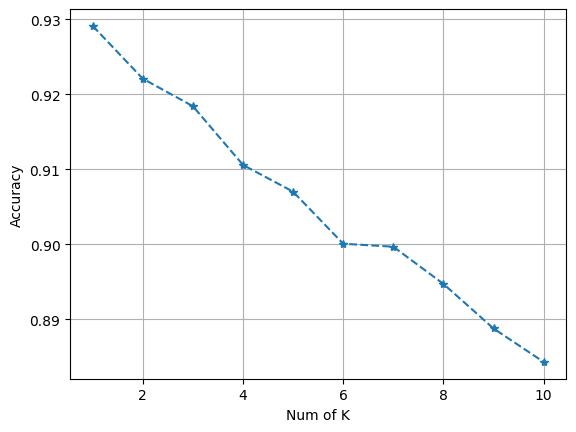

In [ ]:
plt.plot(k_values,acc,marker="*",linestyle="--")
plt.xlabel("Num of K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred))     #83% of restaurants are good and accuracy is 88 %

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6211
           1       0.87      0.82      0.85      3887

    accuracy                           0.88     10098
   macro avg       0.88      0.87      0.88     10098
weighted avg       0.88      0.88      0.88     10098



SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import svm

In [ ]:
svm_class=svm.SVC(kernel="linear",C=1)

In [ ]:
svm_class.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

In [ ]:
Y_Pred=svm_class.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(Y_Pred,Y_test)
classification=classification_report(Y_Pred,Y_test)

In [ ]:
print(classification)   #84 % of the restaurants are good accuracy is 81%

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      7228
           1       0.62      0.84      0.72      2870

    accuracy                           0.81     10098
   macro avg       0.77      0.82      0.79     10098
weighted avg       0.84      0.81      0.82     10098



what makes restaurant hold a good rating? Votes

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
   })
print("\nFeature Importance (Coefficient):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficient):
                       Feature  Coefficient
2                        votes     6.199190
0                   book_table     0.299821
1  approx_cost(for two people)     0.295525
3                 num_of_types     0.055850
4              num_of_cuisines     0.023159


CONCLUSION

Text(0, 0.5, 'Online Order')

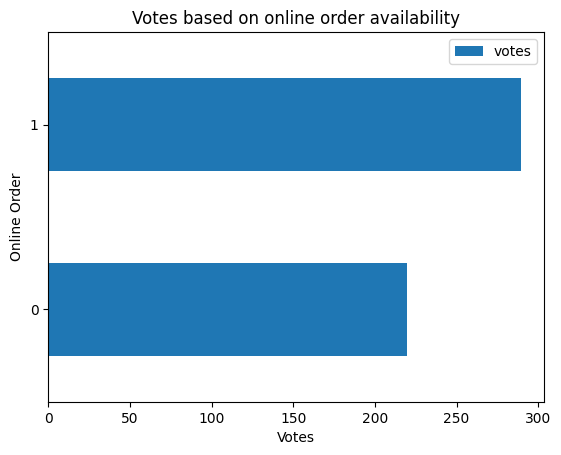

In [ ]:
data.groupby(["online_order"])[["votes"]].mean().plot(kind="barh")
plt.title("Votes based on online order availability")
plt.xlabel("Votes")
plt.ylabel("Online Order")

Text(0, 0.5, 'book_table')

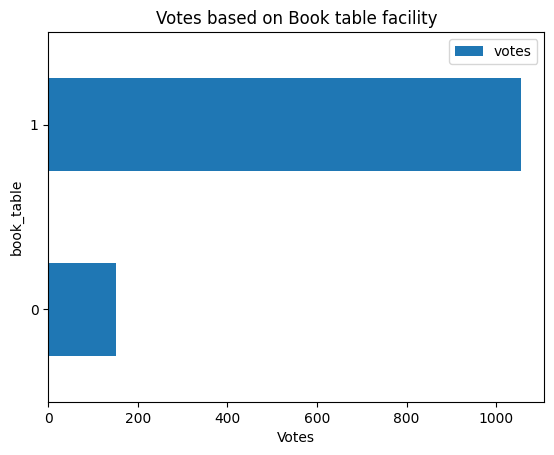

In [ ]:
data.groupby(["book_table"])[["votes"]].mean().plot(kind="barh")
plt.title("Votes based on Book table facility")
plt.xlabel("Votes")
plt.ylabel("book_table")

Text(0, 0.5, 'num_of_cuisines')

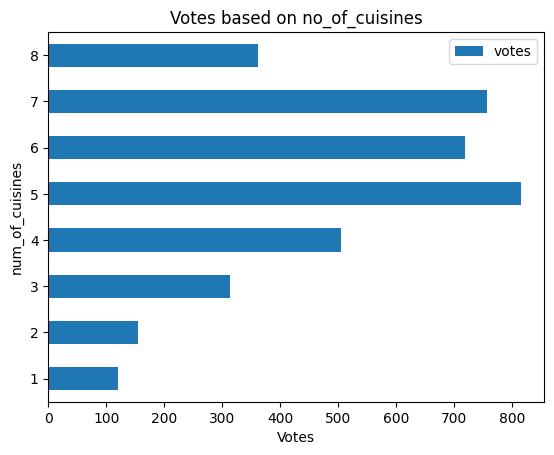

In [ ]:
data.groupby(["num_of_cuisines"])[["votes"]].mean().plot(kind="barh")
plt.title("Votes based on no_of_cuisines")
plt.xlabel("Votes")
plt.ylabel("num_of_cuisines")

Text(0, 0.5, 'num_of_types')

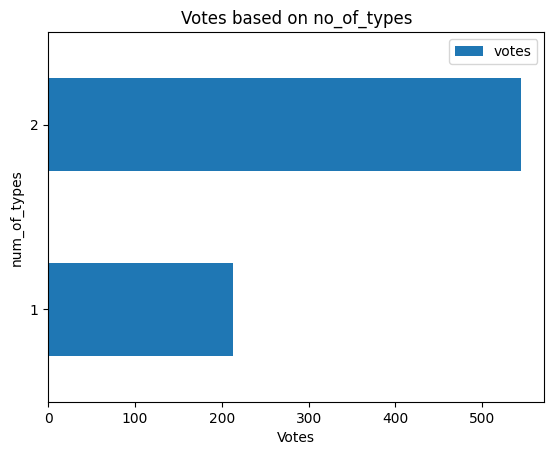

In [ ]:
data.groupby(["num_of_types"])[["votes"]].mean().plot(kind="barh")
plt.title("Votes based on no_of_types")
plt.xlabel("Votes")
plt.ylabel("num_of_types")

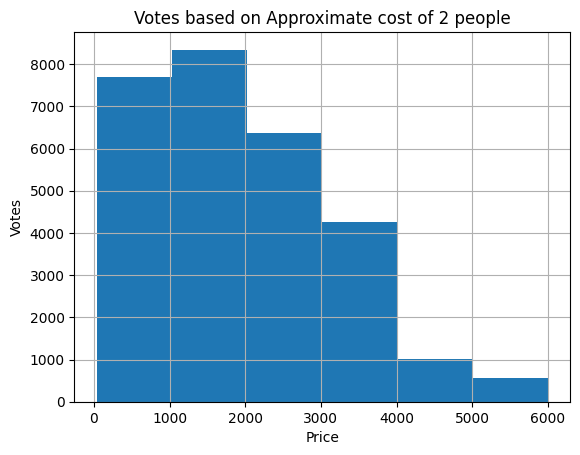

In [ ]:
plt.hist(x=data['approx_cost(for two people)'].unique(),weights=data.groupby(["approx_cost(for two people)"])[["votes"]].mean().values,bins=6)
plt.title("Votes based on Approximate cost of 2 people")
plt.xlabel("Price")
plt.ylabel("Votes")
plt.grid()